In [6]:
pip install scikit-learn

You should consider upgrading via the 'c:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install pandas

     ---------------------------------------- 10.7/10.7 MB 5.8 MB/s eta 0:00:00
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [45]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
pip install seaborn

You should consider upgrading via the 'c:\Users\Dell\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



     -------------------------------------- 293.3/293.3 KB 9.1 MB/s eta 0:00:00
     ---------------------------------------- 7.5/7.5 MB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 2.1/2.1 MB 4.5 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 KB ? eta 0:00:00
     ---------------------------------------- 98.3/98.3 KB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 9.4 MB/s eta 0:00:00
     -------------------------------------- 470.4/470.4 KB 9.8 MB/s eta 0:00:00


Importing the dependencies

In [40]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle

Data Collection & Pre-Processing

In [41]:
# csv file-> pd df

df= pd.read_csv('mail_data.csv')

In [42]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [43]:
# replace all the null (NaN) values in df with empty string

data= df.where((pd.notnull(df)), '')
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [45]:
data.shape

(5572, 2)

Preprocessing: HTML parsing

In [46]:
def parse_html(html_content):
    soup = BeautifulSoup(html_content, 'html.parser')
    text_content = soup.get_text()
    return text_content

In [47]:
df['Message'] = df['Message'].apply(parse_html)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6344\999968365.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(html_content, 'html.parser')


Label Encoding

In [48]:
# Replace 'spam' and 'ham' with numerical labels
# spam= 0 ham= 1

data.loc[data['Category'] == 'spam', 'Category', ]=0
data.loc[data['Category'] == 'ham', 'Category', ]=1

In [49]:
# X= input column (text), Y= target column (label)

X=data['Message']
Y=data['Category'] 

In [50]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [51]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

Splitting the data into training data & test data

In [52]:
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state= 3)

In [53]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [54]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [55]:
# Feature extraction: TF-IDF with N-Grams
# Transform text data to feature vectors that can be used as input to the Logistic Regression

feature_extraction = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)
X_train_features= feature_extraction.fit_transform(X_train)
X_test_features= feature_extraction.transform(X_test)

# Converting Y_train and Y_test values as integers
Y_train= Y_train.astype('int')
Y_test= Y_test.astype('int')

In [56]:
X_train

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object

In [57]:
print(X_train_features)

  (0, 1125)	0.4354512908856219
  (0, 3349)	0.5123088209103893
  (0, 1810)	0.3566769631852489
  (0, 2706)	0.34455509211423857
  (0, 1061)	0.3414453028722271
  (0, 2250)	0.28747099930586173
  (0, 1122)	0.32056310988498327
  (1, 4109)	0.21133578595233718
  (1, 1417)	0.16522037995485295
  (1, 2066)	0.20545289301915814
  (1, 4698)	0.1747879168684823
  (1, 2977)	0.2006462195046766
  (1, 3957)	0.19306185141040974
  (1, 3646)	0.1802620618505333
  (1, 1348)	0.21133578595233718
  (1, 958)	0.21133578595233718
  (1, 2263)	0.19306185141040974
  (1, 4902)	0.1447481964601967
  (1, 1105)	0.131386601765552
  (1, 2446)	0.11741596096372692
  (1, 4745)	0.09942399397314776
  (1, 1709)	0.18466622808494002
  (1, 1824)	0.1965822349545536
  (1, 670)	0.11779259186540393
  (1, 4108)	0.16198812730860587
  :	:
  (4455, 2327)	0.2334045051112899
  (4455, 2865)	0.13058768052470324
  (4455, 2548)	0.11777419417969842
  (4455, 2706)	0.1859028185072312
  (4456, 3770)	0.2411628661551628
  (4456, 3109)	0.22432705849221315


In [58]:
Y_train

3075    1
1787    1
1614    1
4304    1
3266    0
       ..
789     0
968     1
1667    1
3321    1
1688    0
Name: Category, Length: 4457, dtype: int32

# Training the model 
(LOGISTIC REGRESSION)

In [59]:
model= LogisticRegression()

In [60]:
# Training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

# Evaluating trained model

In [61]:
#predictions on training data

predictions_on_training_data= model.predict(X_train_features)
accuracy_on_training_data= accuracy_score(Y_train, predictions_on_training_data)

In [62]:
print('Accuracy on training data: ', accuracy_on_training_data)

Accuracy on training data:  0.9791339466008526


In [63]:
predictions_on_test_data= model.predict(X_test_features)
accuracy_on_test_data= accuracy_score(Y_test, predictions_on_test_data)

In [64]:
print('Accuracy on testing data: ', accuracy_on_test_data)

Accuracy on testing data:  0.9811659192825112


# Building a predictive system

In [65]:
input_your_mail= ["Even my brother is not like to speak with me. They treat me like aids patent."]

#converting text to feature vectors
input_data_features= feature_extraction.transform(input_your_mail)

#making predictions
prediction= model.predict(input_data_features)
print(prediction)

if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail


In [66]:
input_your_mail=["Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030"]
#converting text to feature vectors
input_data_features= feature_extraction.transform(input_your_mail)

#making predictions
prediction= model.predict(input_data_features)
print(prediction)

if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[0]
Spam mail


In [67]:
input_your_mail=[f"Are you looking for an accurate B2B database to reach your targeted audience...?Give us your requirements and get verified business contacts.For SampleKindly review and let me know the following if you are interested:1. Which Region are you targeting?2. Which Industry sector would you like to acquire?3. Which Title/Job Designation would you like to reach?"]
input_data_features= feature_extraction.transform(input_your_mail)

#making predictions
prediction= model.predict(input_data_features)
print(prediction)

if(prediction[0]==1):
    print('Ham mail')
else:
    print('Spam mail')

[1]
Ham mail


# Visualization

In [68]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(Y_test, predictions_on_test_data)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[134  21]
 [  0 960]]


True Positives (TP): 960
There were 960 spam emails, and the model correctly identified all of them as spam.

False Positives (FP): 21
There were 21 non-spam emails that were mistakenly classified as spam.

False Negatives (FN): 0
There were no spam emails that the model incorrectly classified as non-spam. This is a good sign because it means the model did not let any spam emails slip through as legitimate.

True Negatives (TN): 134
There were 134 legitimate emails, and the model correctly identified them as such.

Overall, a high true positive rate, a low false positive rate, and no false negatives are desirable characteristics for a spam detection model, suggesting that it is effective in identifying spam while not causing too many false alarms.






In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

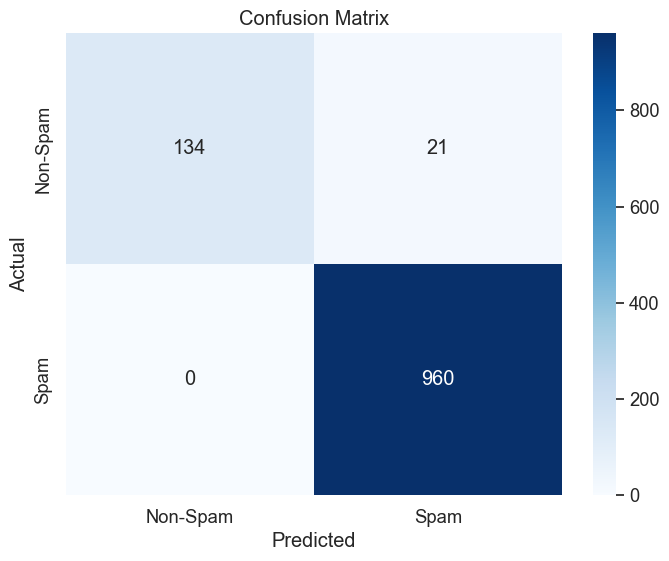

In [70]:
# Define labels for the matrix
labels = ["Non-Spam", "Spam"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Creating pickle file

In [71]:
filename= 'model/Email_Spam_Detection_Model.pkl'
pickle.dump(model, open(filename,'wb'))

In [72]:
filename2= 'model/tf.pkl'
pickle.dump(feature_extraction, open(filename2, 'wb'))

In [73]:
#serializing 

loaded_model= pickle.load(open(filename, 'rb'))
loaded_model.predict(X_test_features)

array([0, 1, 0, ..., 1, 1, 1])